<a href="https://colab.research.google.com/github/bleedblue26/tensorflow/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Download Data

In [44]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/bleedblue26/tensorflow/main/winequalityN.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Clean Data

### Delete unknown values

In [45]:
wine_data.isna().sum()
wine_data = wine_data.dropna()

### Delete unneeded data

### Rename column

In [46]:
wine_data.rename(columns={'type': 'white_wine'},
                  inplace=True)
wine_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Change white_wine to binary

In [47]:
wine_data.loc[wine_data['white_wine'] == 'white', 'white_wine'] = 1
wine_data.loc[wine_data['white_wine'] == 'red', 'white_wine'] = 0
wine_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Change quality to binary

In [48]:
wine_data.loc[wine_data['quality'] <= 6, 'quality'] = 0
wine_data.loc[wine_data['quality'] >=7, 'quality'] = 1
wine_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [49]:
(wine_data['quality'] == 1).sum()

1271

# Visualize data

### Box plots

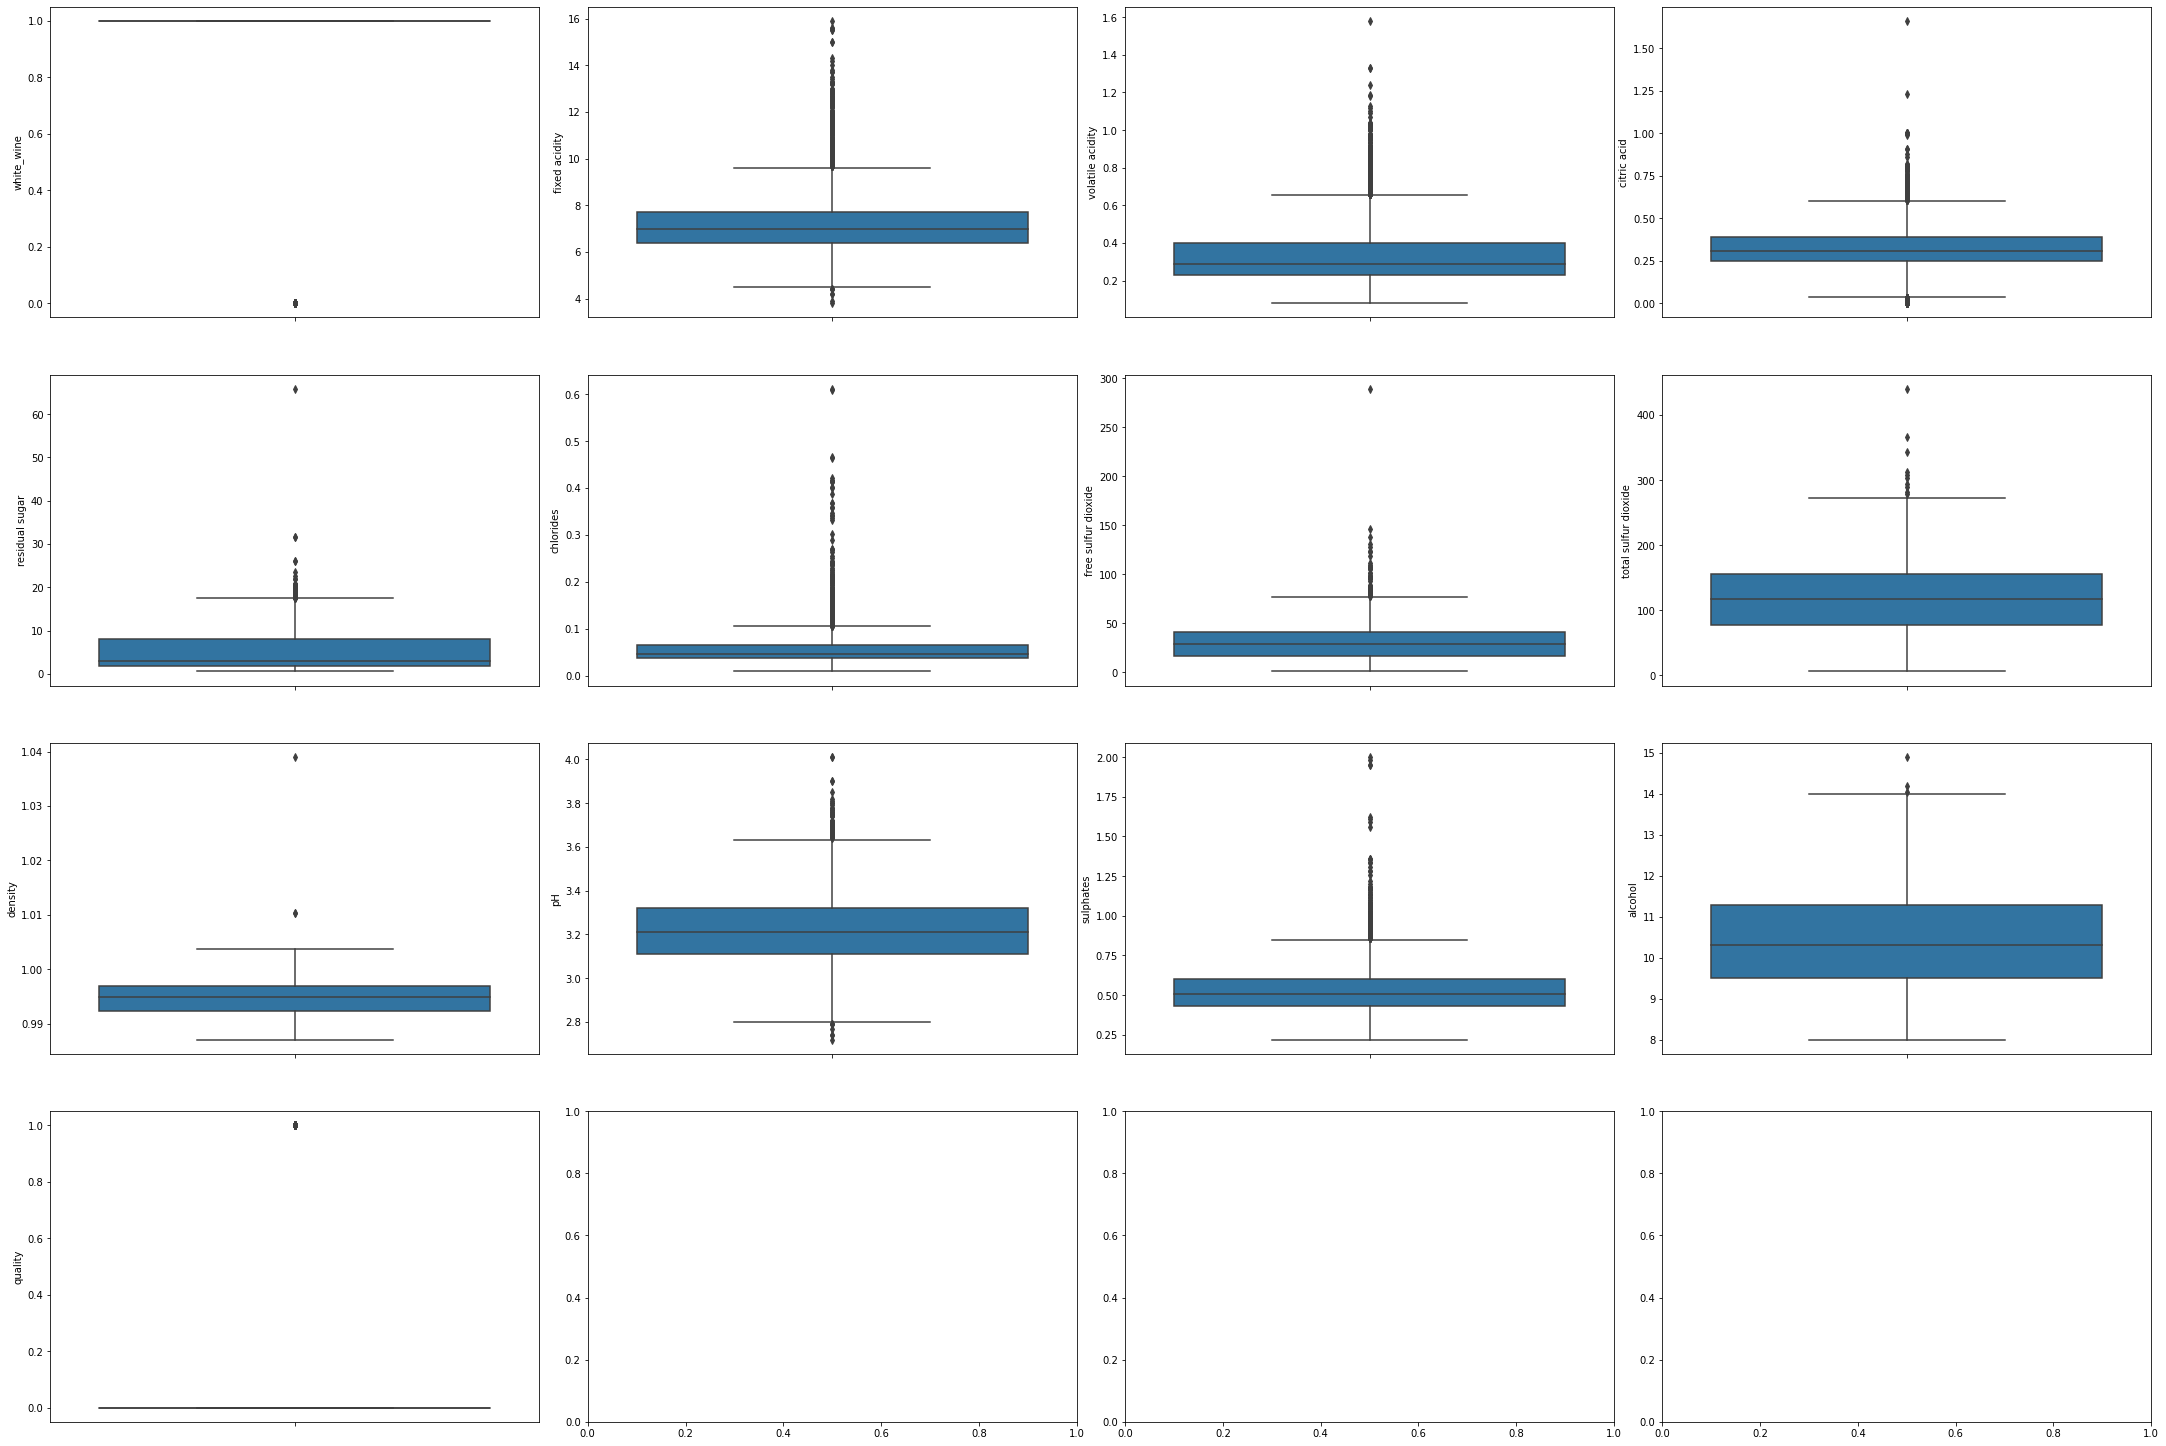

In [50]:
fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in wine_data.items():
  sns.boxplot(y=k, data=wine_data, ax=axs[index])
  index +=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

### Get % of outliers

In [51]:
for k,v in wine_data.items():
  q1 = v.quantile(.25) # 1st quartile
  q3 = v.quantile(.75) # 3rd quartile
  iqr = q3 - q1 # interquartile range
  # lower fence = q1 - (1.5*iqr)
  # upper fence = q3 + (1.5*iqr)
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)] # outliers
  perc = np.shape(v_col)[0] * 100.0 / np.shape(wine_data)[0]
  print('%s outliers = %.2f%%' %(k,perc))

white_wine outliers = 100.00%
fixed acidity outliers = 5.51%
volatile acidity outliers = 5.94%
citric acid outliers = 7.84%
residual sugar outliers = 1.81%
chlorides outliers = 4.39%
free sulfur dioxide outliers = 1.04%
total sulfur dioxide outliers = 0.15%
density outliers = 0.05%
pH outliers = 1.13%
sulphates outliers = 2.96%
alcohol outliers = 0.05%
quality outliers = 100.00%


### Histogram

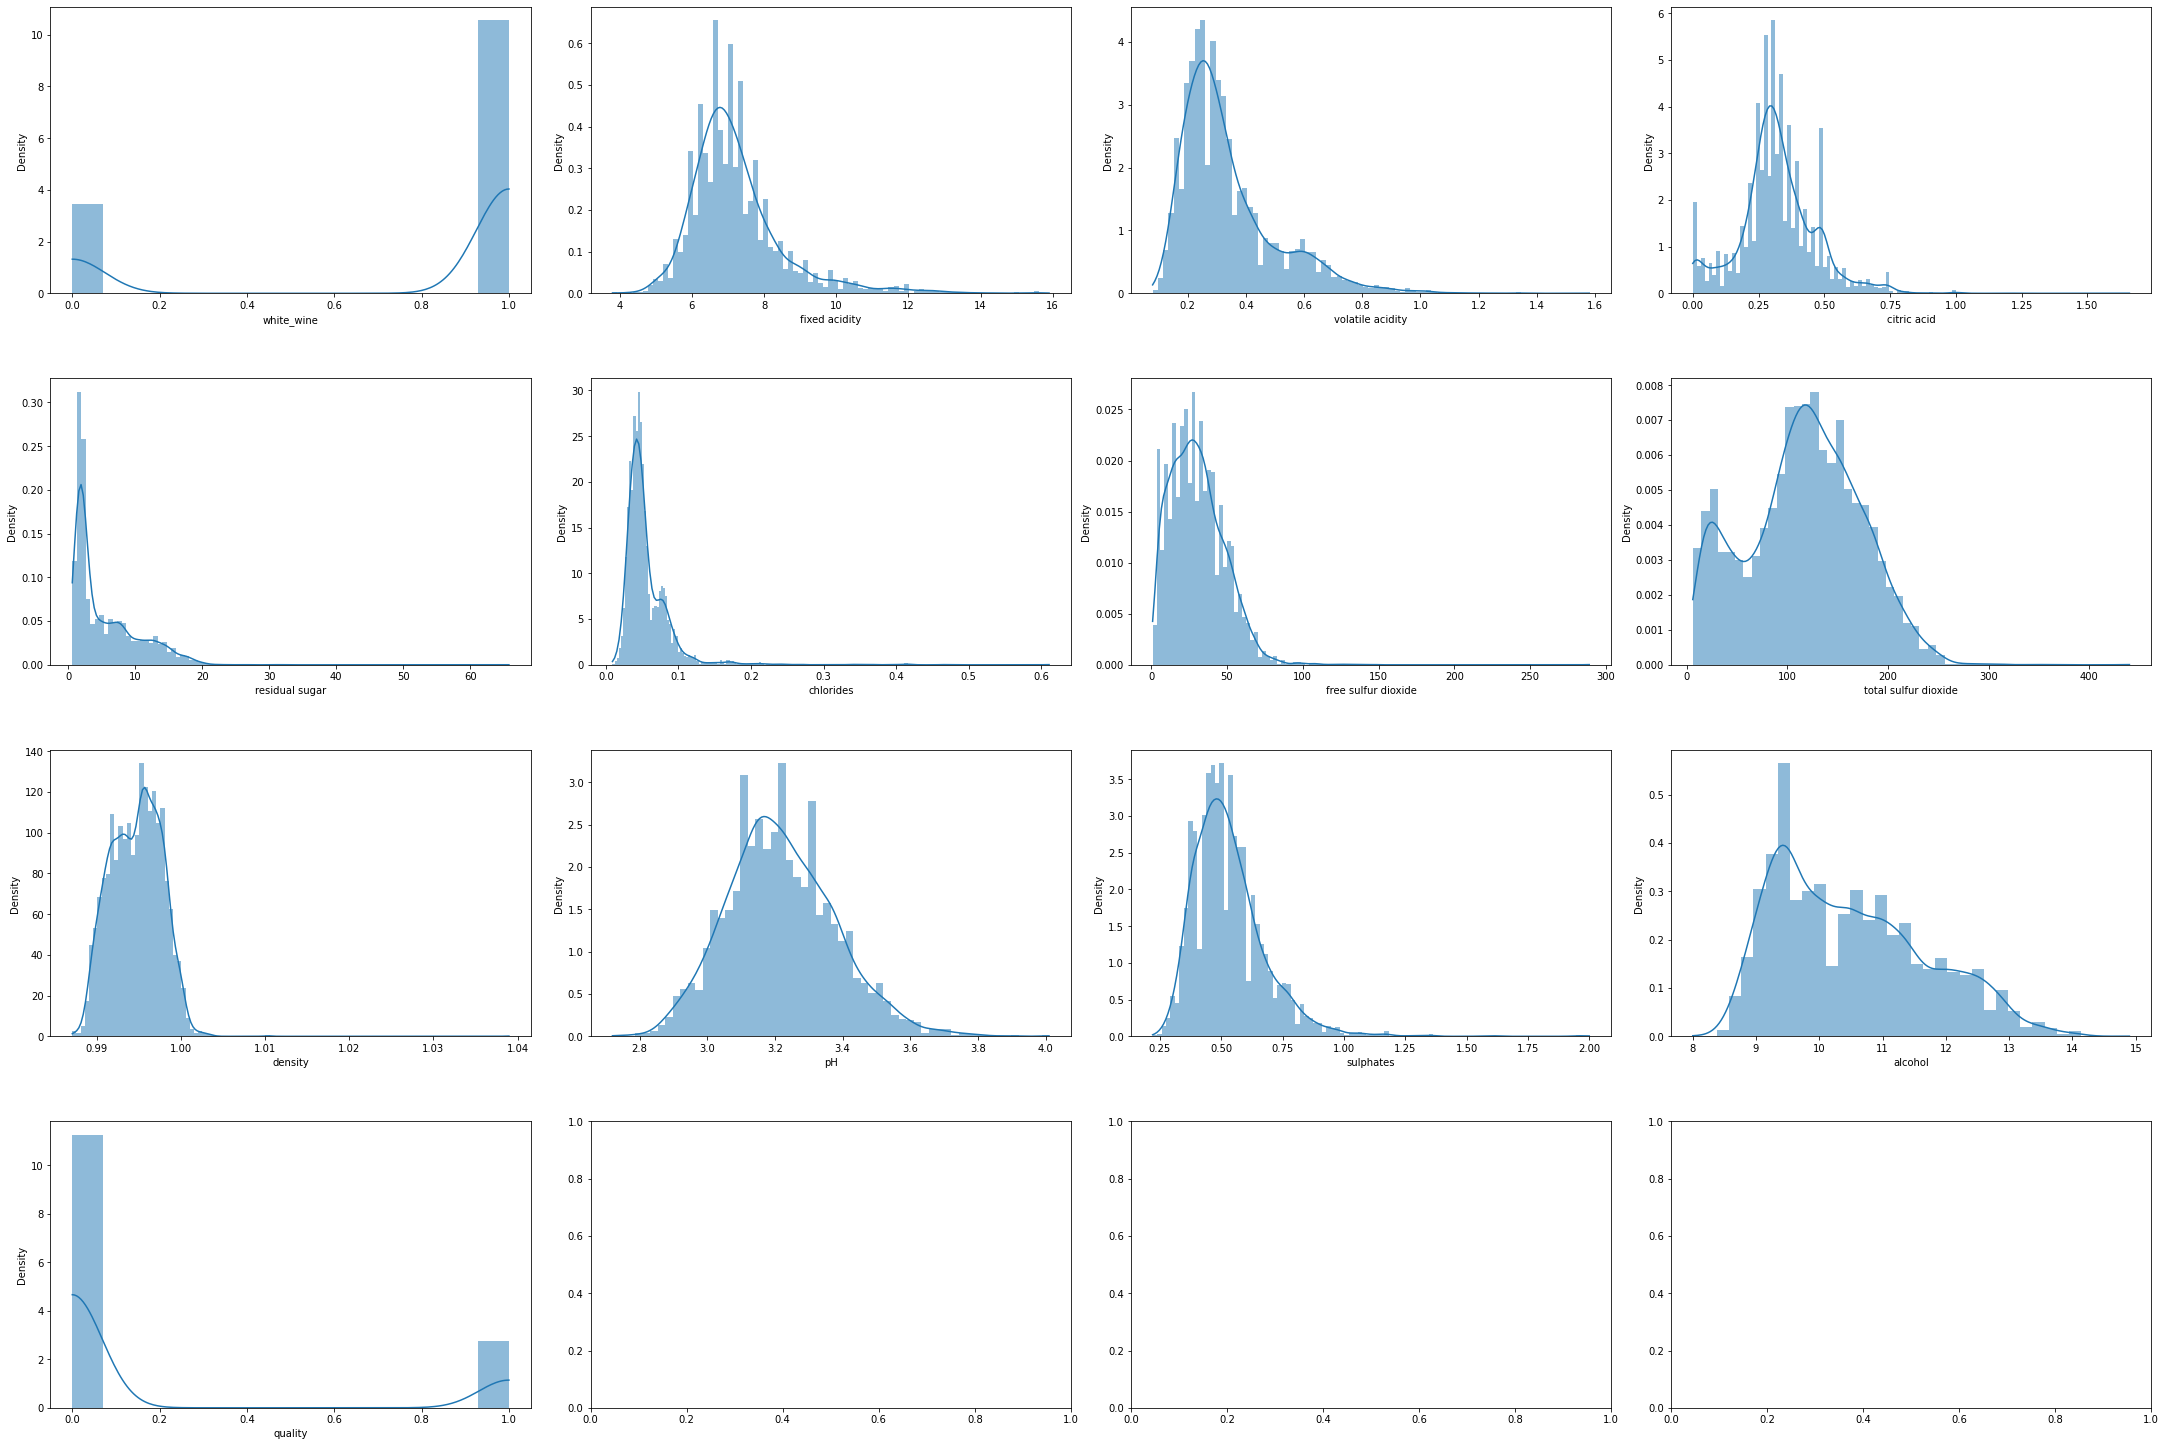

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in wine_data.items():
  sns.histplot(v, ax=axs[index], kde=True, stat='density', linewidth=0)
  index +=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

### Correlation matrix

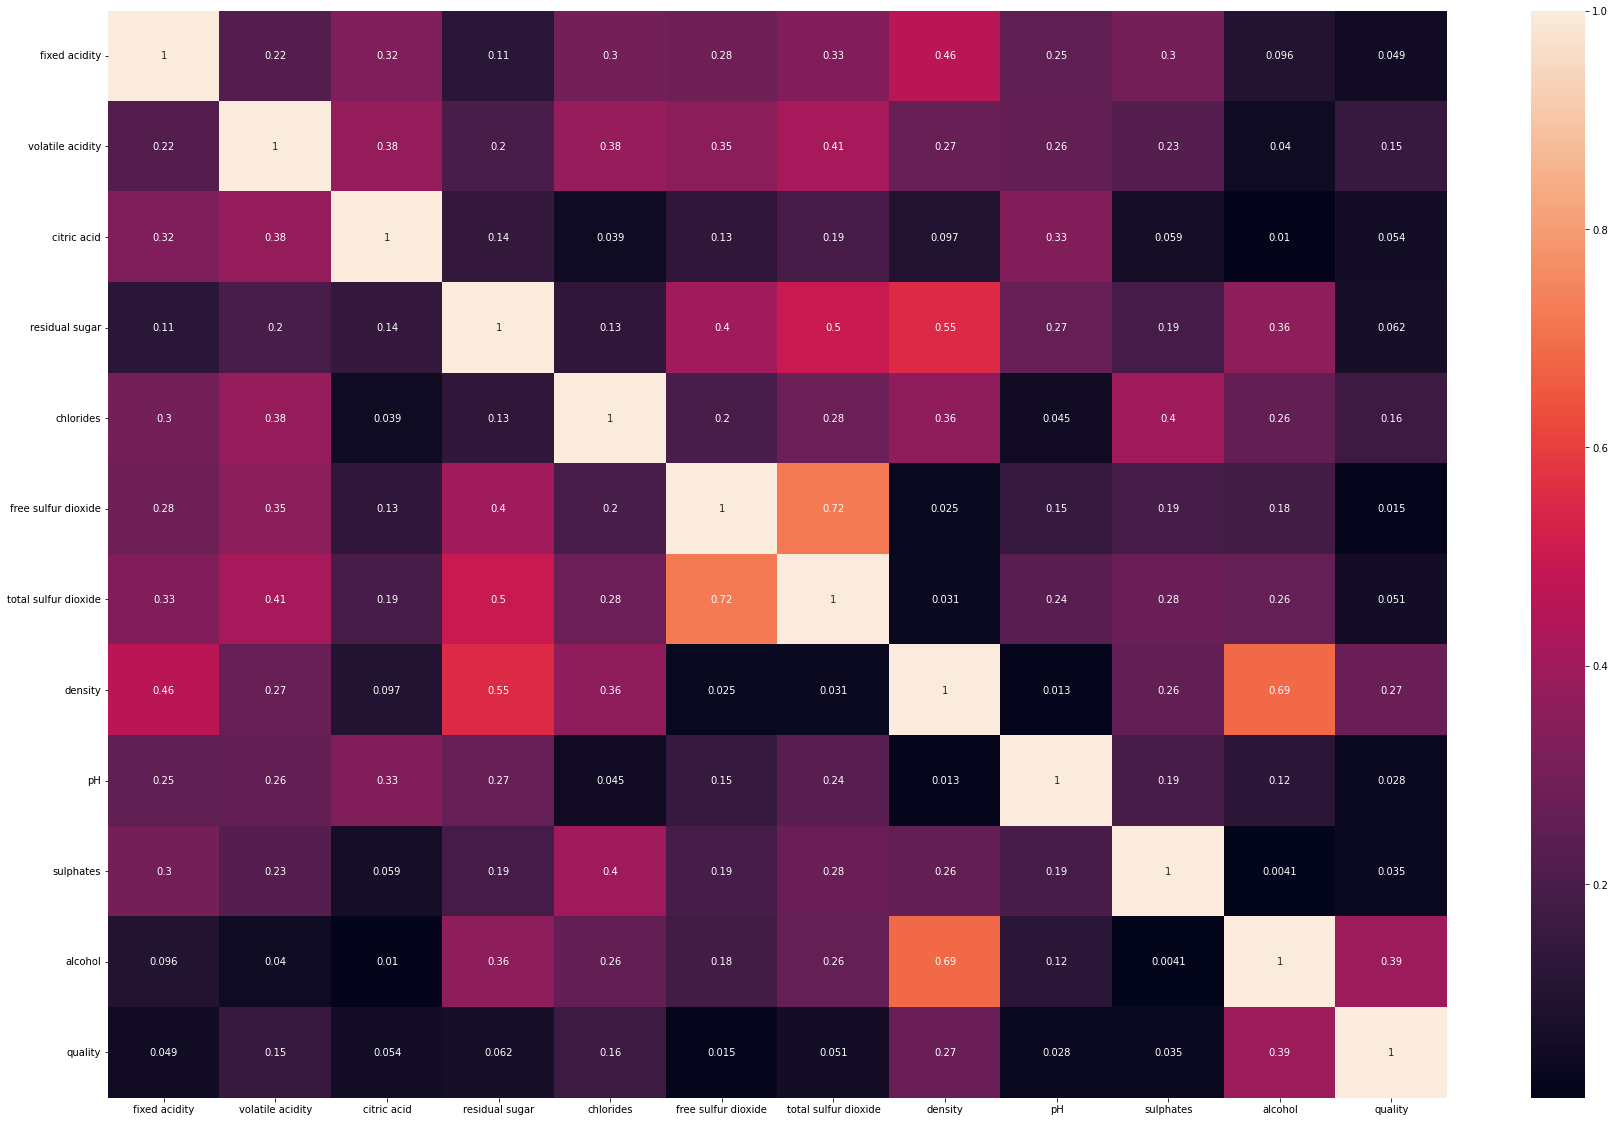

In [53]:
plt.figure(figsize=(30,20))
sns.heatmap(wine_data.corr().abs(), annot=True)

# Preprocess Data

### Normalize and One hot encode data

In [54]:
# # Basic
# ct = make_column_transformer(
#     (MinMaxScaler(),['alcohol', 'density']),
#     # (sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'),['pos'])
# )

# Everything
ct = make_column_transformer(
    (MinMaxScaler(),['white_wine', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']),
)

# Process Data

### Separate features and labels

In [55]:
X = wine_data.drop('quality', axis=1) # Features
y = wine_data['quality'] # Labels

### Separate training and testing data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

### Transform data

In [57]:
ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
X_train_normalized

array([[0.        , 0.50413223, 0.34      , ..., 0.45736434, 0.2752809 ,
        0.26086957],
       [1.        , 0.16528926, 0.04666667, ..., 0.40310078, 0.16292135,
        0.1884058 ],
       [1.        , 0.19008264, 0.16      , ..., 0.59689922, 0.12359551,
        0.36231884],
       ...,
       [0.        , 0.32231405, 0.33333333, ..., 0.46511628, 0.19101124,
        0.36231884],
       [0.        , 0.49586777, 0.28      , ..., 0.45736434, 0.32022472,
        0.39130435],
       [0.        , 0.40495868, 0.14      , ..., 0.41085271, 0.20224719,
        0.2173913 ]])

# Build Neural Network

In [58]:
tf.random.set_seed(26)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
]
)
# Mean Absolute Error - average of error between predictions and observed data
model_1.compile(
    optimizer='Adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
fit_data = model_1.fit(X_train_normalized, y_train, epochs=100, verbose=0)

### Evaluate model

In [59]:
# Basic
model_loss, model_accuracy = model_1.evaluate(X_test_normalized, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8345


In [60]:
# Everything
model_loss, model_accuracy = model_1.evaluate(X_test_normalized, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8345


In [61]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 4)                 52        
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


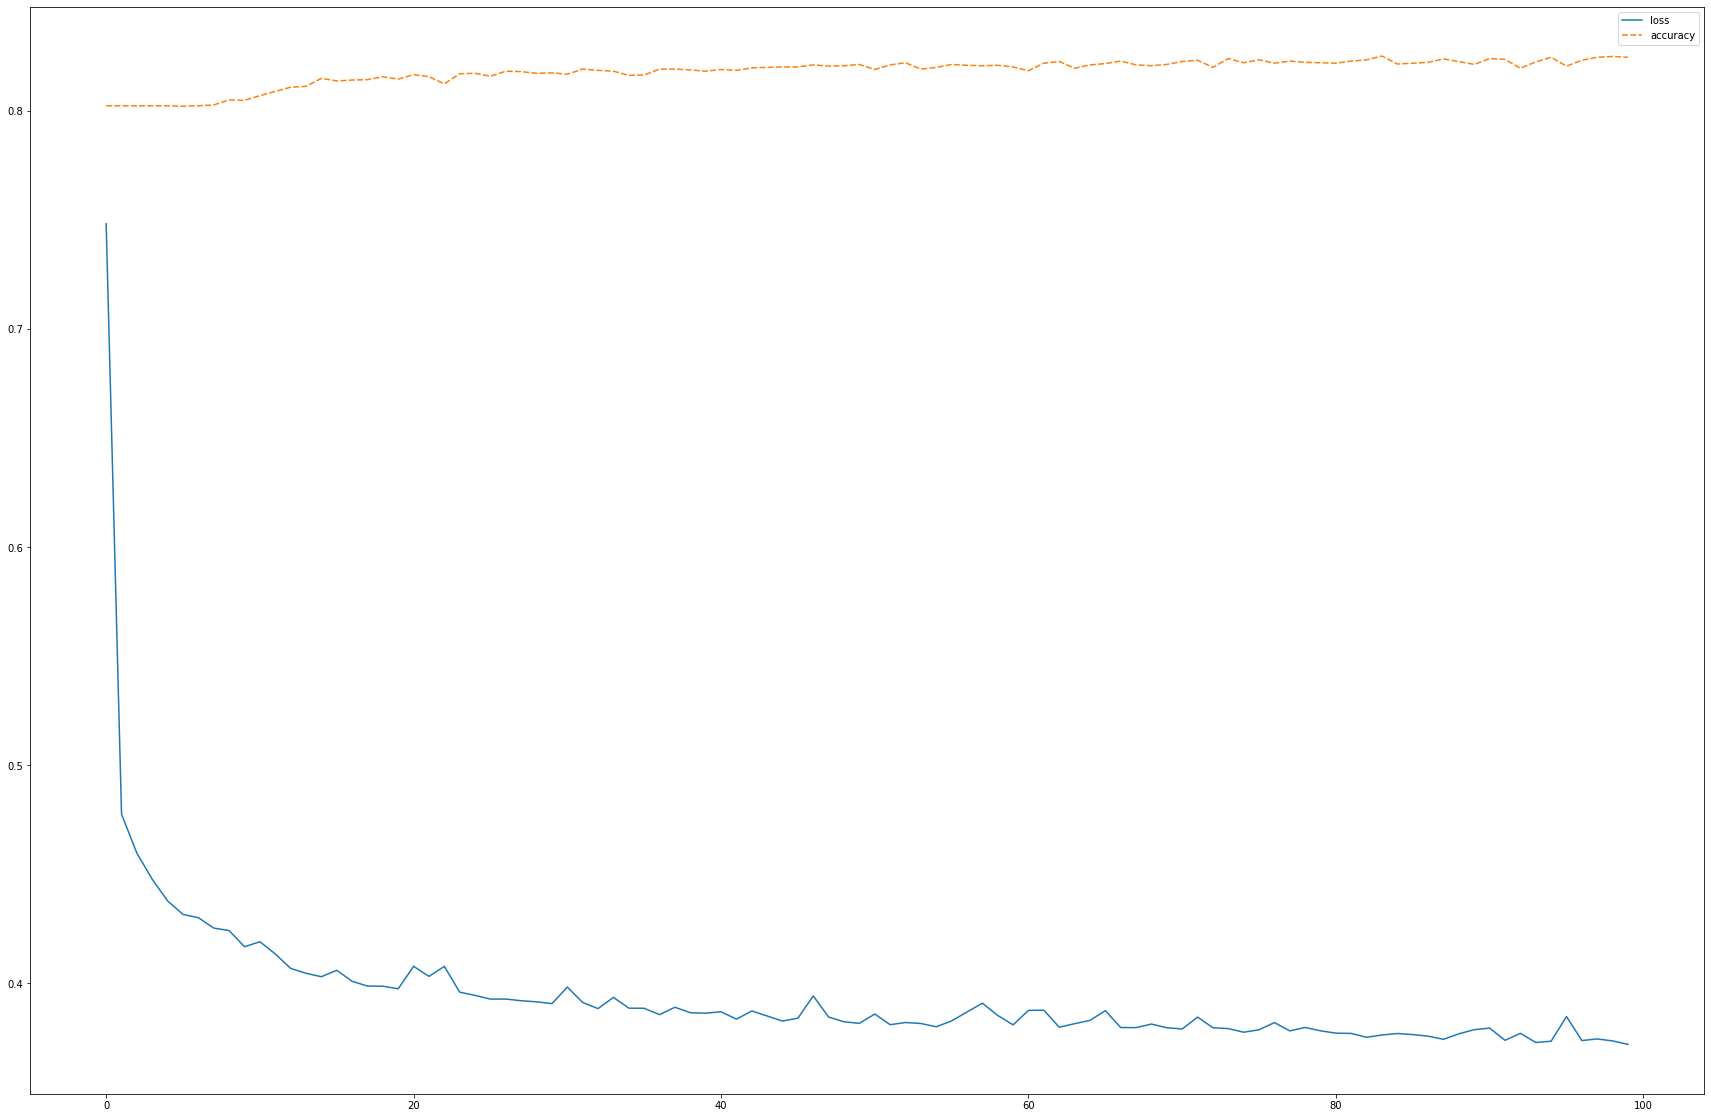

In [62]:
plt.figure(figsize=(30,20))
sns.lineplot(data=fit_data.history)